In [3]:
import numpy as np 
import pandas as pd 

In [4]:
np.random.seed(42)

set1no = 900 
set2no = 100 

In [5]:
df1 = pd.DataFrame({
    "feature_1" : np.random.normal(loc = 0, scale = 1, size = set1no),
    "feature_2" : np.random.normal(loc = 0, scale = 1, size = set1no),

    "target" : [0] * set1no
})

df2 = pd.DataFrame({
    "feature_1" : np.random.normal(loc = 0, scale = 1, size = set2no),
    "feature_2" : np.random.normal(loc = 0, scale = 1, size = set2no),

    "target" : [1] * set2no
})

In [6]:
df1 

feature_1  feature_2  target
0     0.496714   0.368673       0
1    -0.138264  -0.393339       0
2     0.647689   0.028745       0
3     1.523030   1.278452       0
4    -0.234153   0.191099       0
..         ...        ...     ...
895   0.648710  -0.751969       0
896  -0.167118  -0.319054       0
897   0.146714  -0.796026       0
898   1.206509   1.076007       0
899  -0.816936   0.021312       0

[900 rows x 3 columns]

In [7]:
df2

feature_1  feature_2  target
0    1.901191   0.696954       1
1   -0.060661  -0.333819       1
2   -0.708407   1.173125       1
3   -1.513714   0.369642       1
4   -1.803140  -0.107302       1
..        ...        ...     ...
95  -0.370011   1.070150       1
96  -0.258796  -0.026521       1
97   1.598647  -0.881875       1
98   0.560919  -0.163067       1
99  -0.295480  -0.744903       1

[100 rows x 3 columns]

In [8]:
df = pd.concat([df1, df2]).reset_index(drop = True)

In [9]:
df

feature_1  feature_2  target
0     0.496714   0.368673       0
1    -0.138264  -0.393339       0
2     0.647689   0.028745       0
3     1.523030   1.278452       0
4    -0.234153   0.191099       0
..         ...        ...     ...
995  -0.370011   1.070150       1
996  -0.258796  -0.026521       1
997   1.598647  -0.881875       1
998   0.560919  -0.163067       1
999  -0.295480  -0.744903       1

[1000 rows x 3 columns]

In [10]:
df.target.unique()

array([0, 1])

In [11]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [12]:
#upsampling -> sample minority
#downsampling -> sample majority

In [13]:
df_minority = df[df["target"] == 1]

In [14]:
df_minority

feature_1  feature_2  target
900   1.901191   0.696954       1
901  -0.060661  -0.333819       1
902  -0.708407   1.173125       1
903  -1.513714   0.369642       1
904  -1.803140  -0.107302       1
..         ...        ...     ...
995  -0.370011   1.070150       1
996  -0.258796  -0.026521       1
997   1.598647  -0.881875       1
998   0.560919  -0.163067       1
999  -0.295480  -0.744903       1

[100 rows x 3 columns]

In [15]:
df_majority = df[df.target == 0]

In [16]:
df_majority

feature_1  feature_2  target
0     0.496714   0.368673       0
1    -0.138264  -0.393339       0
2     0.647689   0.028745       0
3     1.523030   1.278452       0
4    -0.234153   0.191099       0
..         ...        ...     ...
895   0.648710  -0.751969       0
896  -0.167118  -0.319054       0
897   0.146714  -0.796026       0
898   1.206509   1.076007       0
899  -0.816936   0.021312       0

[900 rows x 3 columns]

In [17]:
from sklearn.utils import resample

In [22]:
df_minority_unsampled = resample(df_minority, replace = True, n_samples = len(df_majority), random_state = 42)

In [23]:
df_minority_unsampled

feature_1  feature_2  target
951   1.775311   1.261922       1
992  -0.436386   1.188913       1
914  -0.268531  -1.801058       1
971  -0.214921  -2.940389       1
960  -0.134309  -0.054894       1
..         ...        ...     ...
952  -1.193637  -0.905732       1
965  -1.662492   0.089581       1
976  -0.562168   1.124113       1
942  -0.548725   0.269127       1
974   1.310309  -0.018709       1

[900 rows x 3 columns]

In [27]:
df_unsampled = pd.concat([df_majority, df_minority_unsampled])

In [28]:
df_unsampled

feature_1  feature_2  target
0     0.496714   0.368673       0
1    -0.138264  -0.393339       0
2     0.647689   0.028745       0
3     1.523030   1.278452       0
4    -0.234153   0.191099       0
..         ...        ...     ...
952  -1.193637  -0.905732       1
965  -1.662492   0.089581       1
976  -0.562168   1.124113       1
942  -0.548725   0.269127       1
974   1.310309  -0.018709       1

[1800 rows x 3 columns]

In [29]:
df_unsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [31]:
df_majority_unsampled = resample(df_majority, n_samples = len(df_minority), random_state = 42)

In [32]:
df_majority_unsampled

feature_1  feature_2  target
102  -0.342715   0.059630       0
435   0.074095  -0.337086       0
860   0.202923   1.639965       0
270   1.441273   0.758929       0
106   1.886186   0.895193       0
..         ...        ...     ...
201   0.560785  -2.896255       0
269   0.130741   0.853416       0
862   1.547505   0.075434       0
815  -1.485560  -0.090533       0
270   1.441273   0.758929       0

[100 rows x 3 columns]

In [33]:
df_downsampled = pd.concat([df_minority, df_majority_unsampled])

In [34]:
df_downsampled

feature_1  feature_2  target
900   1.901191   0.696954       1
901  -0.060661  -0.333819       1
902  -0.708407   1.173125       1
903  -1.513714   0.369642       1
904  -1.803140  -0.107302       1
..         ...        ...     ...
201   0.560785  -2.896255       0
269   0.130741   0.853416       0
862   1.547505   0.075434       0
815  -1.485560  -0.090533       0
270   1.441273   0.758929       0

[200 rows x 3 columns]

In [35]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [36]:
# upsampling-SMOTE(Synhtetic Minority Over-Sampling Technique)

In [37]:
df

feature_1  feature_2  target
0     0.496714   0.368673       0
1    -0.138264  -0.393339       0
2     0.647689   0.028745       0
3     1.523030   1.278452       0
4    -0.234153   0.191099       0
..         ...        ...     ...
995  -0.370011   1.070150       1
996  -0.258796  -0.026521       1
997   1.598647  -0.881875       1
998   0.560919  -0.163067       1
999  -0.295480  -0.744903       1

[1000 rows x 3 columns]

In [39]:
import matplotlib.pyplot as plt

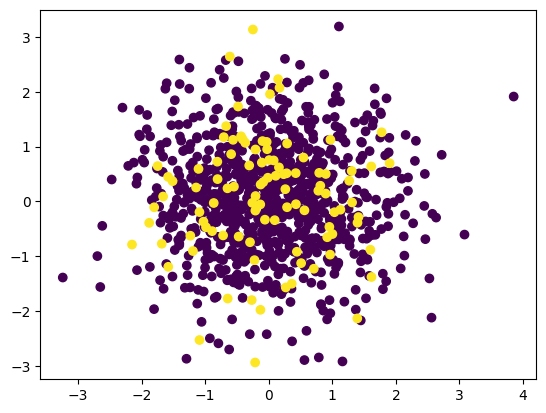

In [42]:
plt.scatter(df['feature_1'], df["feature_2"], c = df.target)

In [43]:
!pip install imblearn

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
oversample = SMOTE()

In [46]:
(x,y) = oversample.fit_resample(df[["feature_1", "feature_2"]], df.target)

In [47]:
x

feature_1  feature_2
0      0.496714   0.368673
1     -0.138264  -0.393339
2      0.647689   0.028745
3      1.523030   1.278452
4     -0.234153   0.191099
...         ...        ...
1795   0.701868  -0.173309
1796   1.545917  -1.335943
1797   1.358114  -0.225781
1798   0.486916  -0.147628
1799   0.504733  -1.114370

[1800 rows x 2 columns]

In [48]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [49]:
oversample_df = pd.concat([x,y], axis = 1)

In [50]:
oversample_df

feature_1  feature_2  target
0      0.496714   0.368673       0
1     -0.138264  -0.393339       0
2      0.647689   0.028745       0
3      1.523030   1.278452       0
4     -0.234153   0.191099       0
...         ...        ...     ...
1795   0.701868  -0.173309       1
1796   1.545917  -1.335943       1
1797   1.358114  -0.225781       1
1798   0.486916  -0.147628       1
1799   0.504733  -1.114370       1

[1800 rows x 3 columns]

In [51]:
oversample_df.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

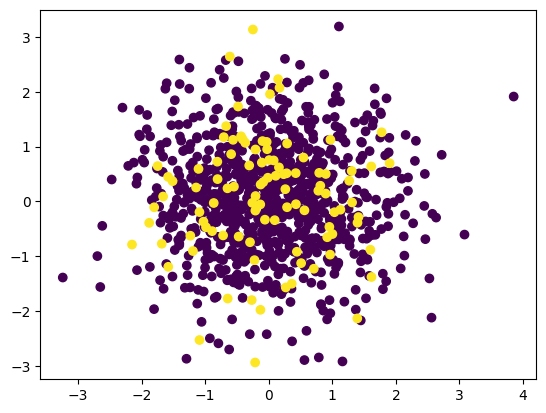

In [52]:
plt.scatter(df.feature_1, df.feature_2, c = df.target)

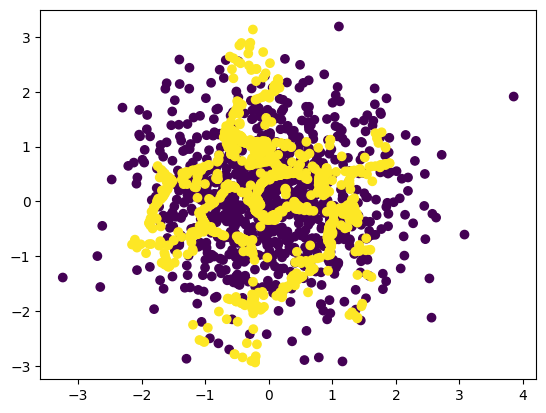

In [54]:
plt.scatter(oversample_df.feature_1, oversample_df.feature_2, c = oversample_df.target)